# 1. Importing essential libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2. Gathering the data

In [4]:
df = pd.read_csv('data/concrete_data.csv')

# 3. Understanding the data

#### 3.1 Sample of the data 
#### 3.2 Size of the data
#### 3.3 Columns of the data
#### 3.4 Dtypes of the columns
#### 3.5 Statstical info of numercial columns
#### 3.6 Null values in each column
#### 3.7 Duplicate instances
#### 3.8 Correlation between the columns
#### 3.9 Skewness in data

In [5]:
#Sample of data
df.sample(5)

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
645   203.5               305.3      0.0  203.5               0.0   
72    425.0               106.3      0.0  153.5              16.5   
281   251.4                 0.0    118.3  188.5               6.4   
451   167.0                75.4    167.0  164.0               7.9   
931   144.0                15.0    195.0  176.0               6.0   

     coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
645             963.4            630.0    7                          19.54  
72              852.1            887.1    3                          33.40  
281            1028.4            757.7   28                          32.66  
451            1007.3            770.1   56                          53.46  
931            1021.0            709.0   28                          15.34

In [6]:
#Shape of data frame
obs,col = df.shape
print(f'The number of observation in the given dataframe are : {obs}\nand the number of columns are : {col}')

The number of observation in the given dataframe are : 1030
and the number of columns are : 9


In [7]:
#Columns in the dataframe
columns_lst = list(df.columns)
columns_lst

['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'fine_aggregate ',
 'age',
 'concrete_compressive_strength']

In [8]:
#Dtypes and meta-data of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [9]:
#Stastical info of nummeric columns
df.describe()

cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate           age  \
count       1030.000000       1030.000000      1030.000000  1030.000000   
mean           6.204660        972.918932       773.580485    45.662136   
std            5.973841         77.753954        80.175980    63.169912   
min            0.000000        801.000000       594.000000     1.000000   
25%            0.000000        932.000000       730.950000     7.000000   
50%            6.400000        968.000000       779.500000    28.000000   
75%           10.200000       1029.400000       824.000000    56.000000   
max           32.200000       1145.000000       992.600000   365.000000   

       concrete_compressive_strength  
count                    1030.000000  
mean                       35.817961  
std                        16.705742  
min                         2.330000  
25%                        23.710000  
50%                        34.445000  
75%                        46.135000  
max                        82.600000

In [10]:
#Null values
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [11]:
#Duplicate observations
df.duplicated().sum()

25

In [12]:
#Dropping duplicates
df.drop_duplicates(inplace=True)

### Conclusion : 
#### 25 duplicates in the dataframe

In [13]:
#Correlation between the columns
df.corr()[['concrete_compressive_strength']].sort_values(by = 'concrete_compressive_strength')

concrete_compressive_strength
water                                              -0.269624
fine_aggregate                                     -0.186448
coarse_aggregate                                   -0.144717
fly_ash                                            -0.080648
blast_furnace_slag                                  0.103374
age                                                 0.337367
superplasticizer                                    0.344209
cement                                              0.488283
concrete_compressive_strength                       1.000000

In [14]:
#Skewness in the data
pd.DataFrame(df.skew().sort_values(),columns=['skewness'])

skewness
fine_aggregate                -0.252353
coarse_aggregate              -0.065256
water                          0.034433
concrete_compressive_strength  0.395696
fly_ash                        0.497231
cement                         0.564959
blast_furnace_slag             0.855225
superplasticizer               0.980604
age                            3.253974

## 4.Exploratory Data Anlaysis

In [15]:
sns.set_theme()

In [16]:
numeric_columns = df.select_dtypes(exclude='object').columns.tolist()
categorical_columns = df.select_dtypes(include='object').columns.tolist()

In [17]:
print(f'The number of numerical columns in the given data frame are : {len(numeric_columns)}')
print(f'The number of categorical columns in the given data frame are : {len(categorical_columns)}')

The number of numerical columns in the given data frame are : 9
The number of categorical columns in the given data frame are : 0


### 4) a) Univariate Analysis

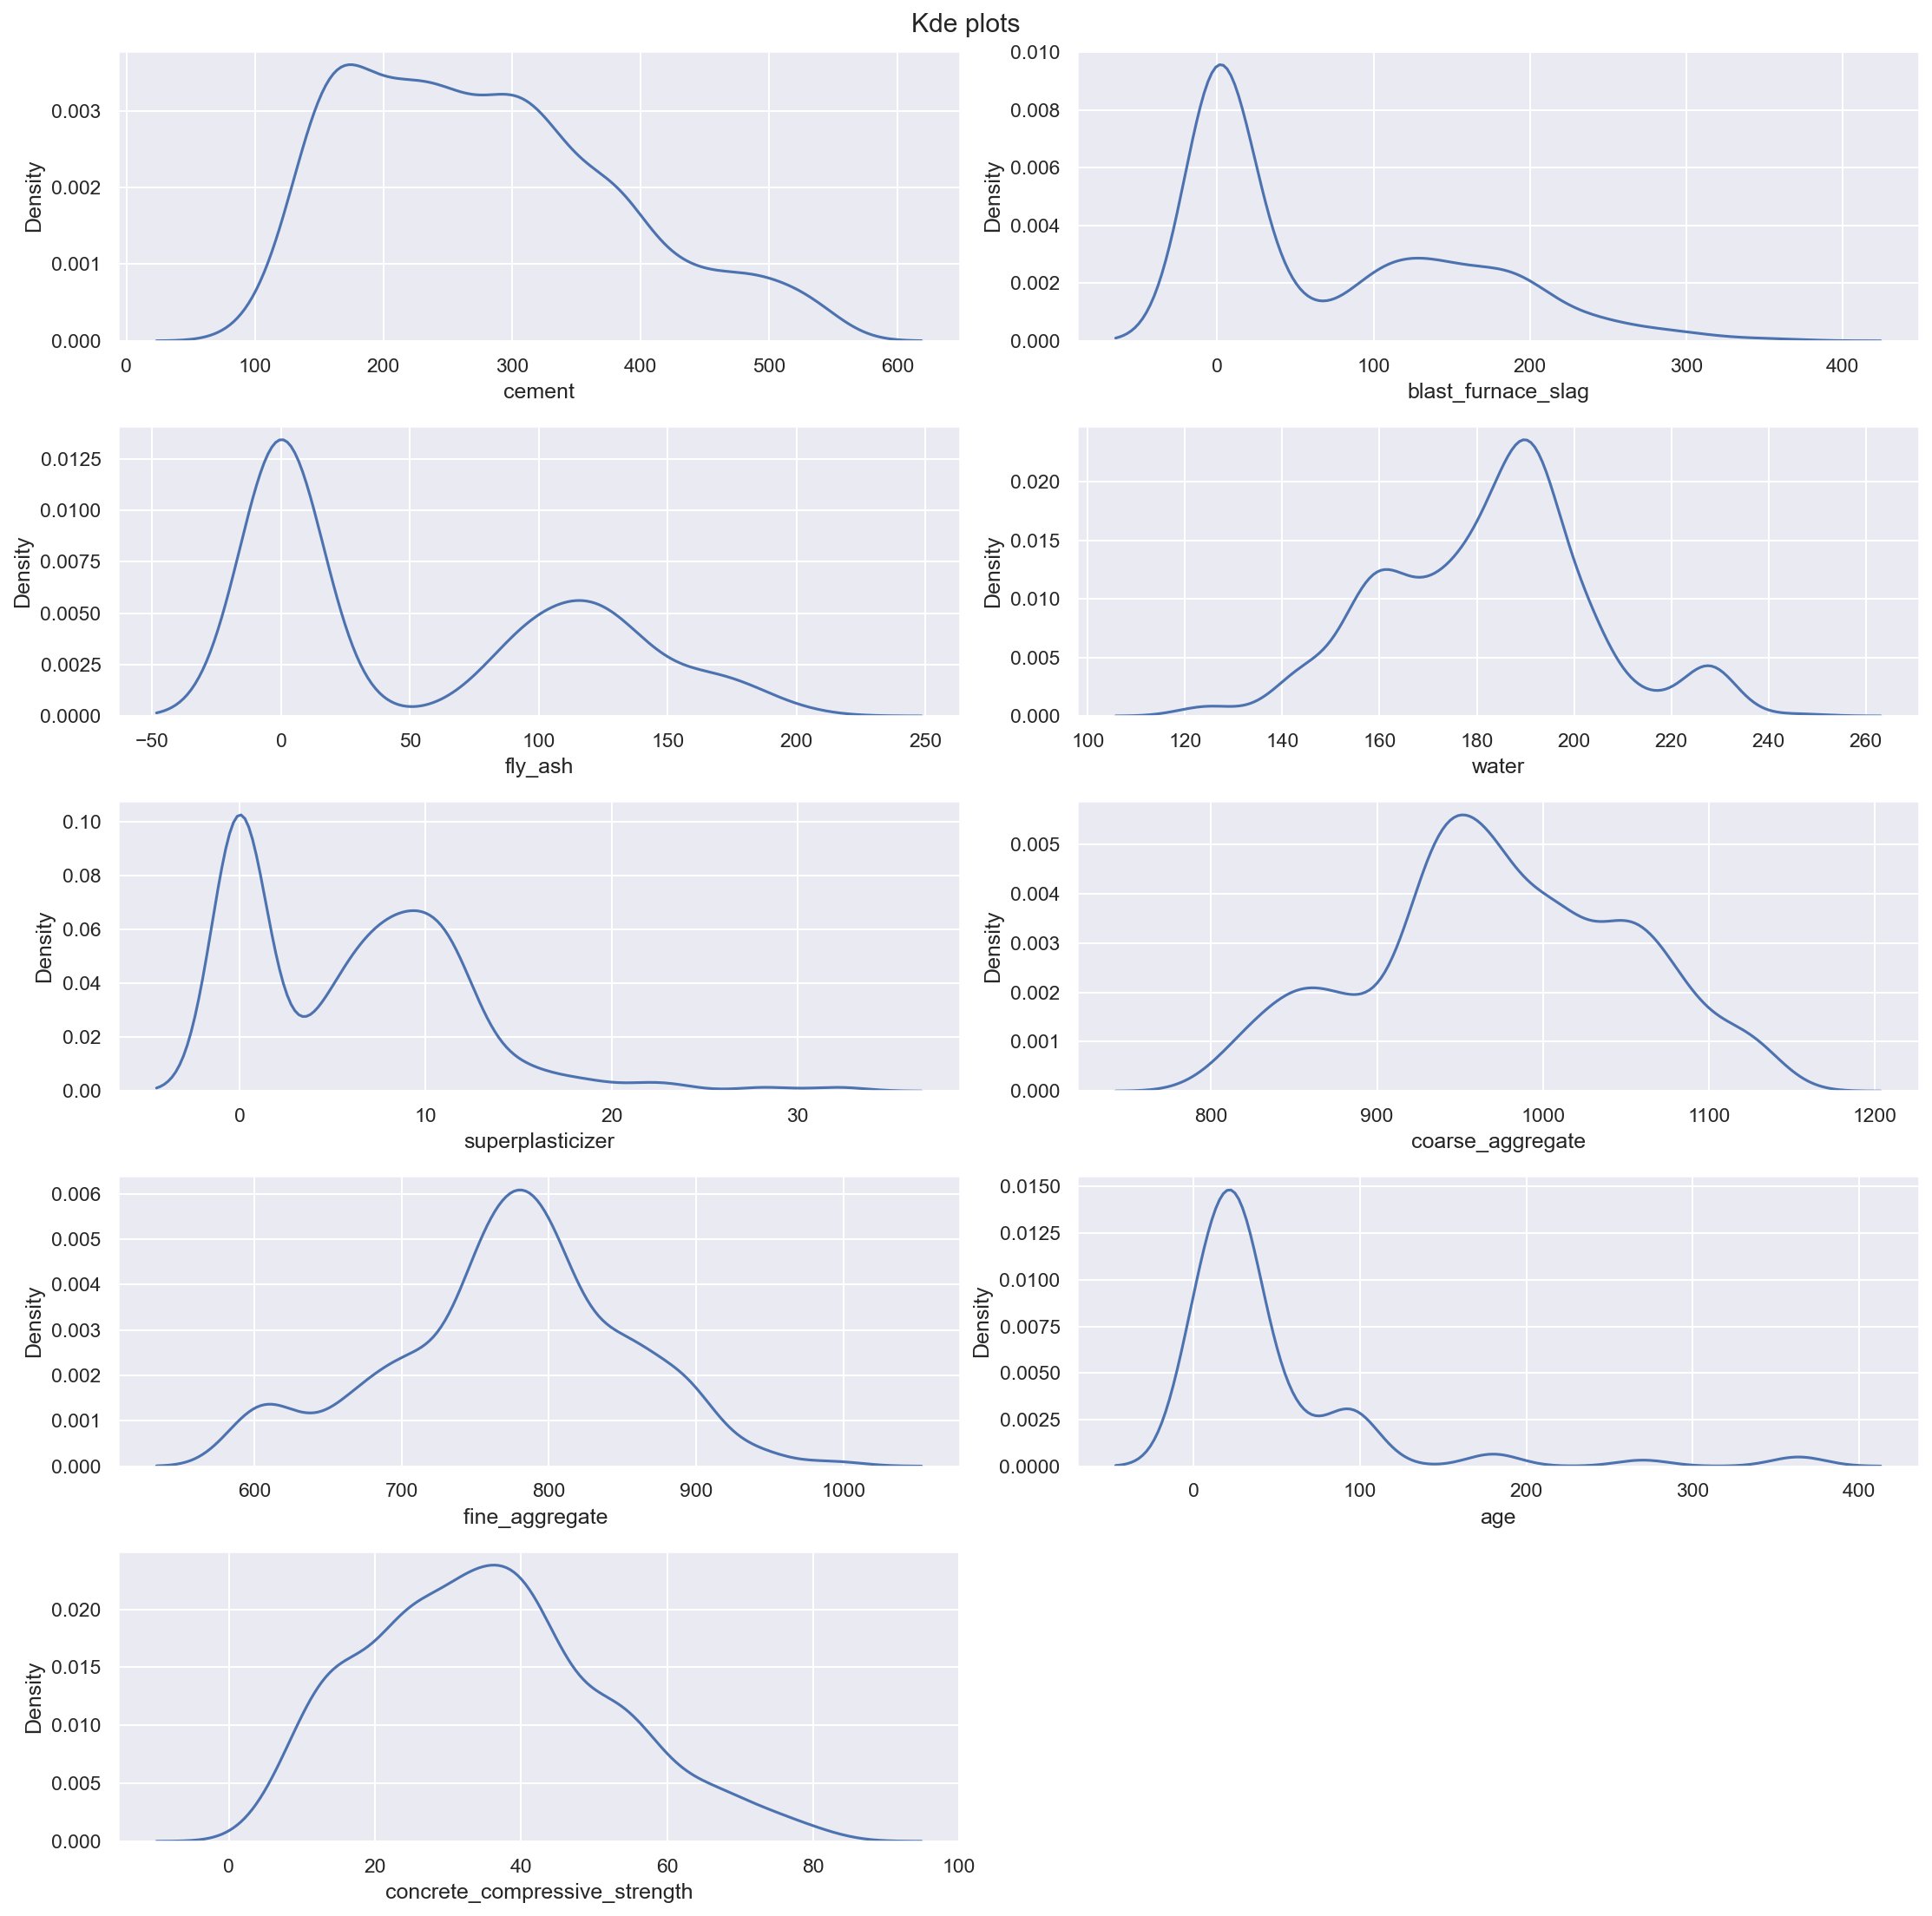

In [18]:
plt.figure(figsize=(15,15),dpi = 150)
for num,col in enumerate(numeric_columns, start = 1):
    plt.subplot(5,2,num)
    sns.kdeplot(data = df,x = col)
plt.suptitle('Kde plots')
plt.tight_layout()

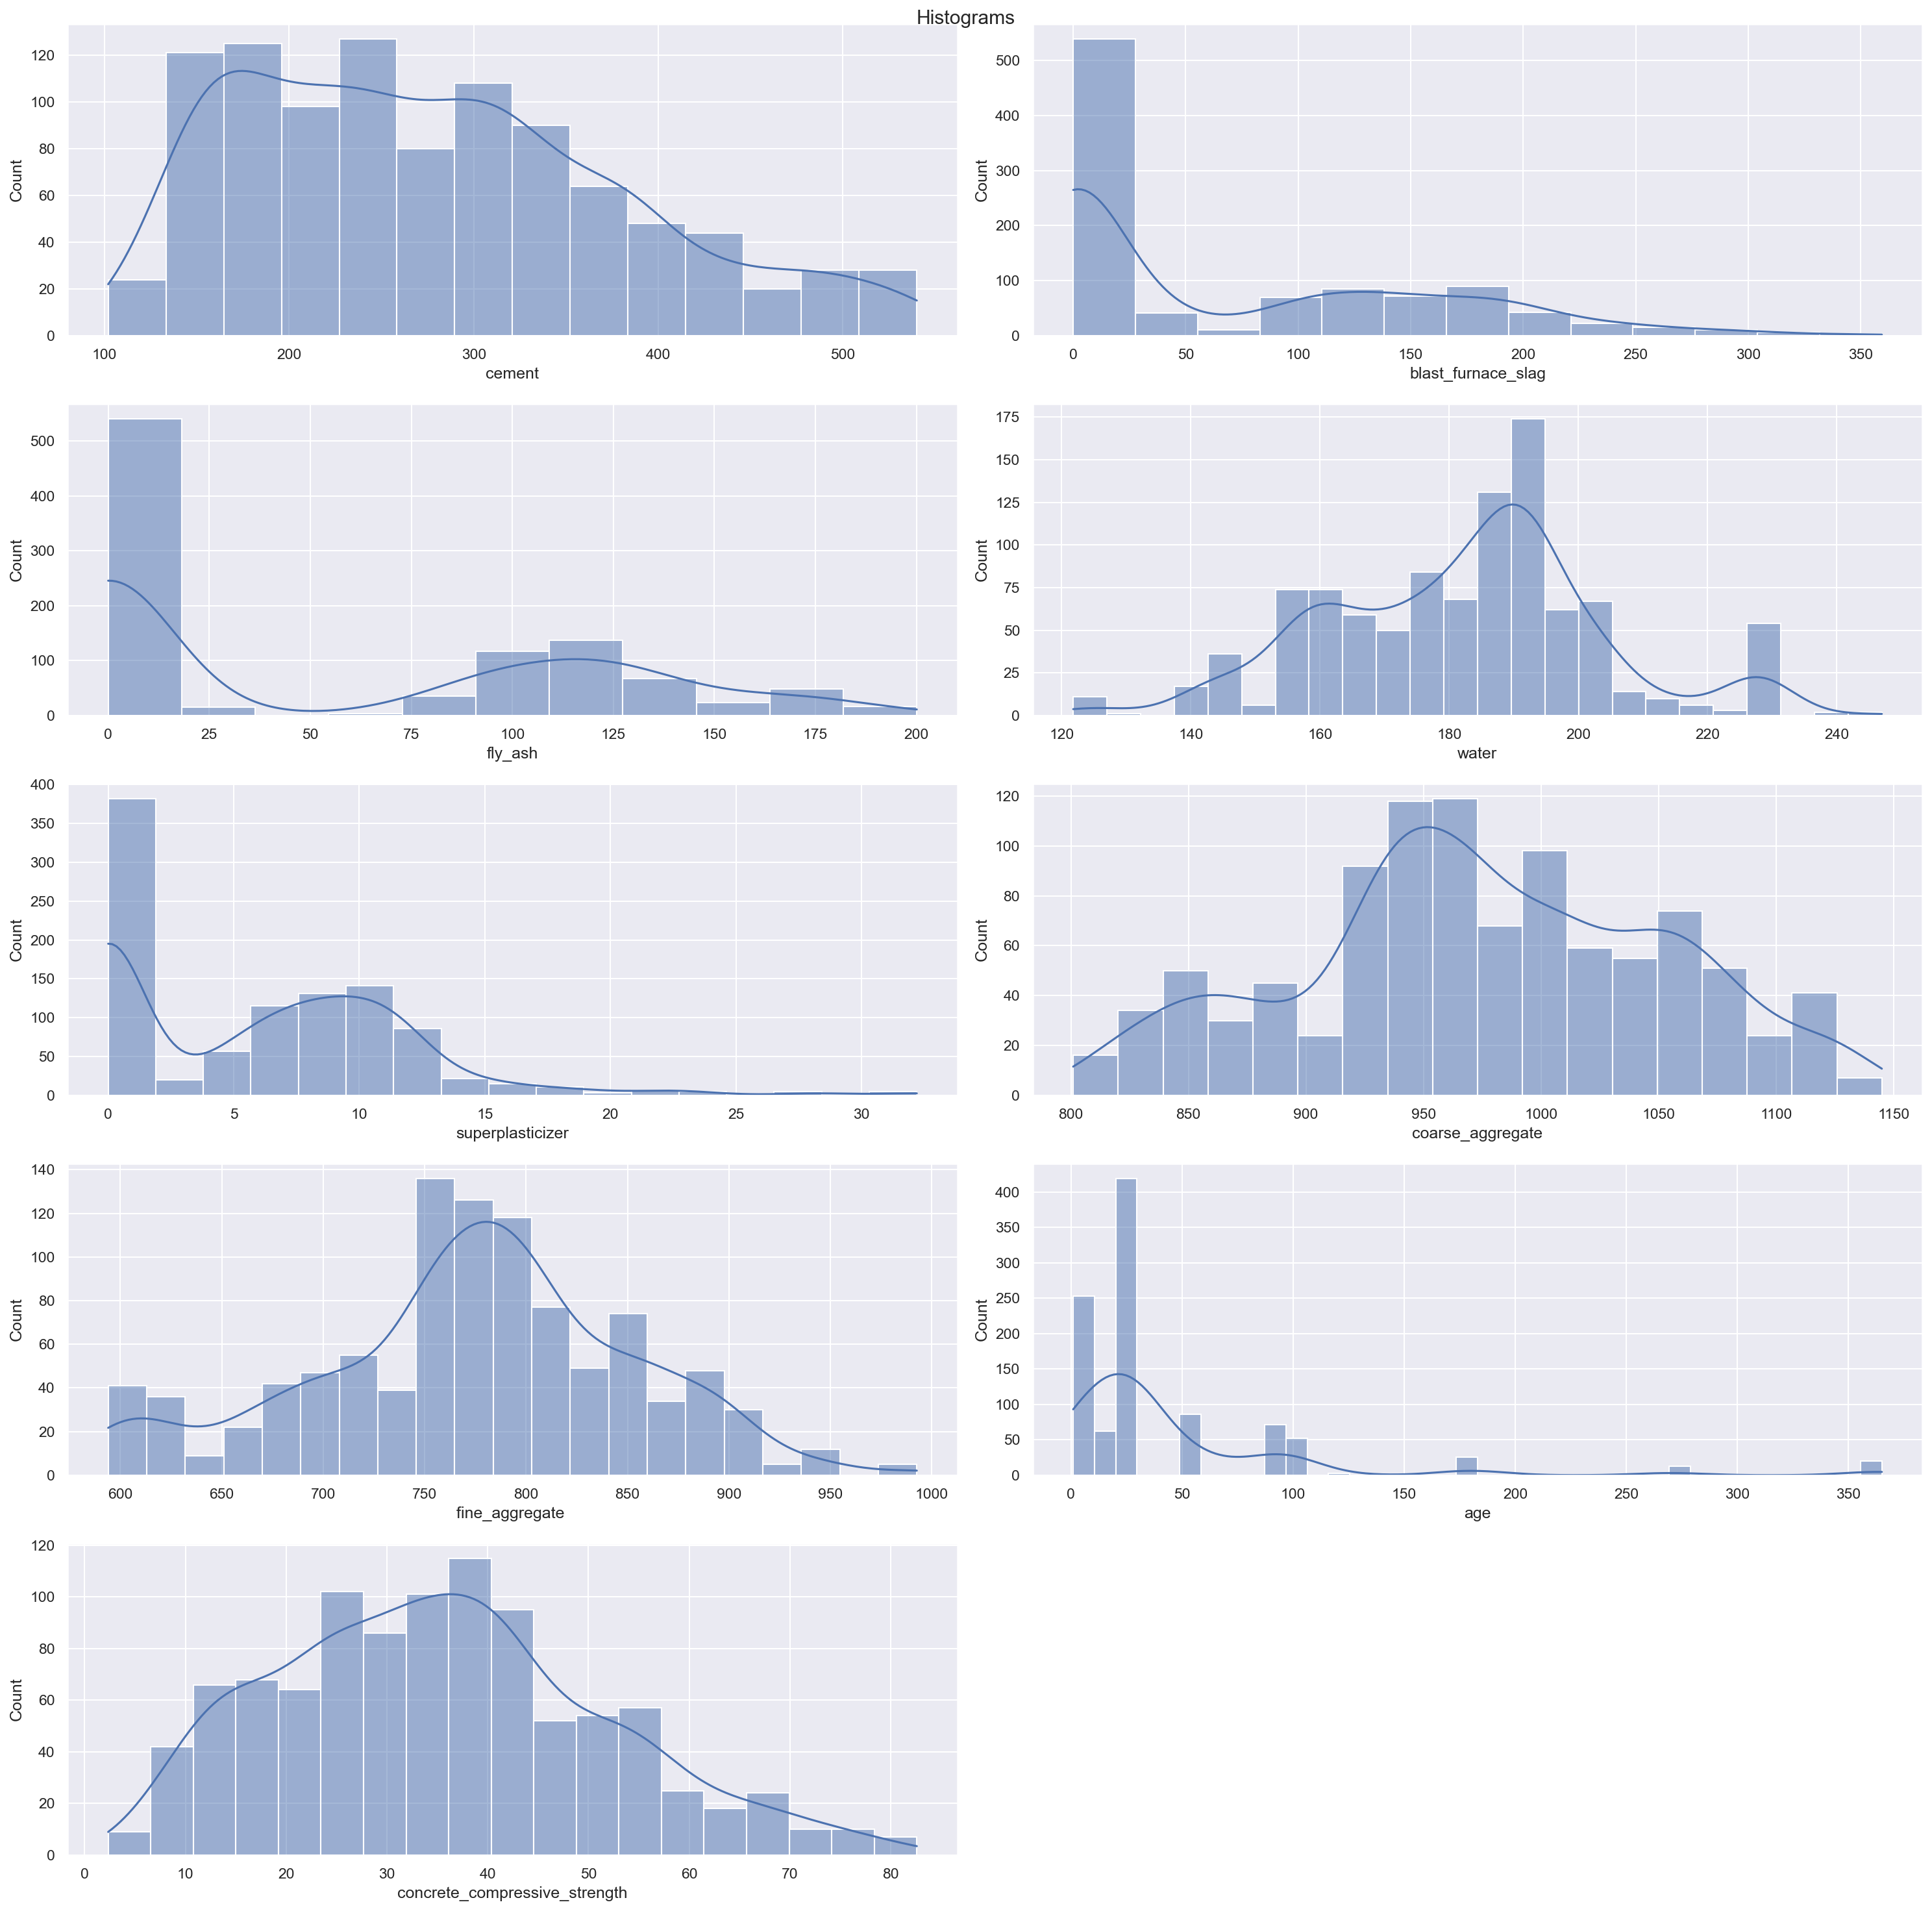

In [19]:
plt.figure(figsize = (20,20),dpi = 150)
for num, col in enumerate(numeric_columns,start = 1):
    plt.subplot(5,2,num)
    sns.histplot(data = df,x = col, kde = True)
plt.suptitle('Histograms')
plt.tight_layout()
plt.show()

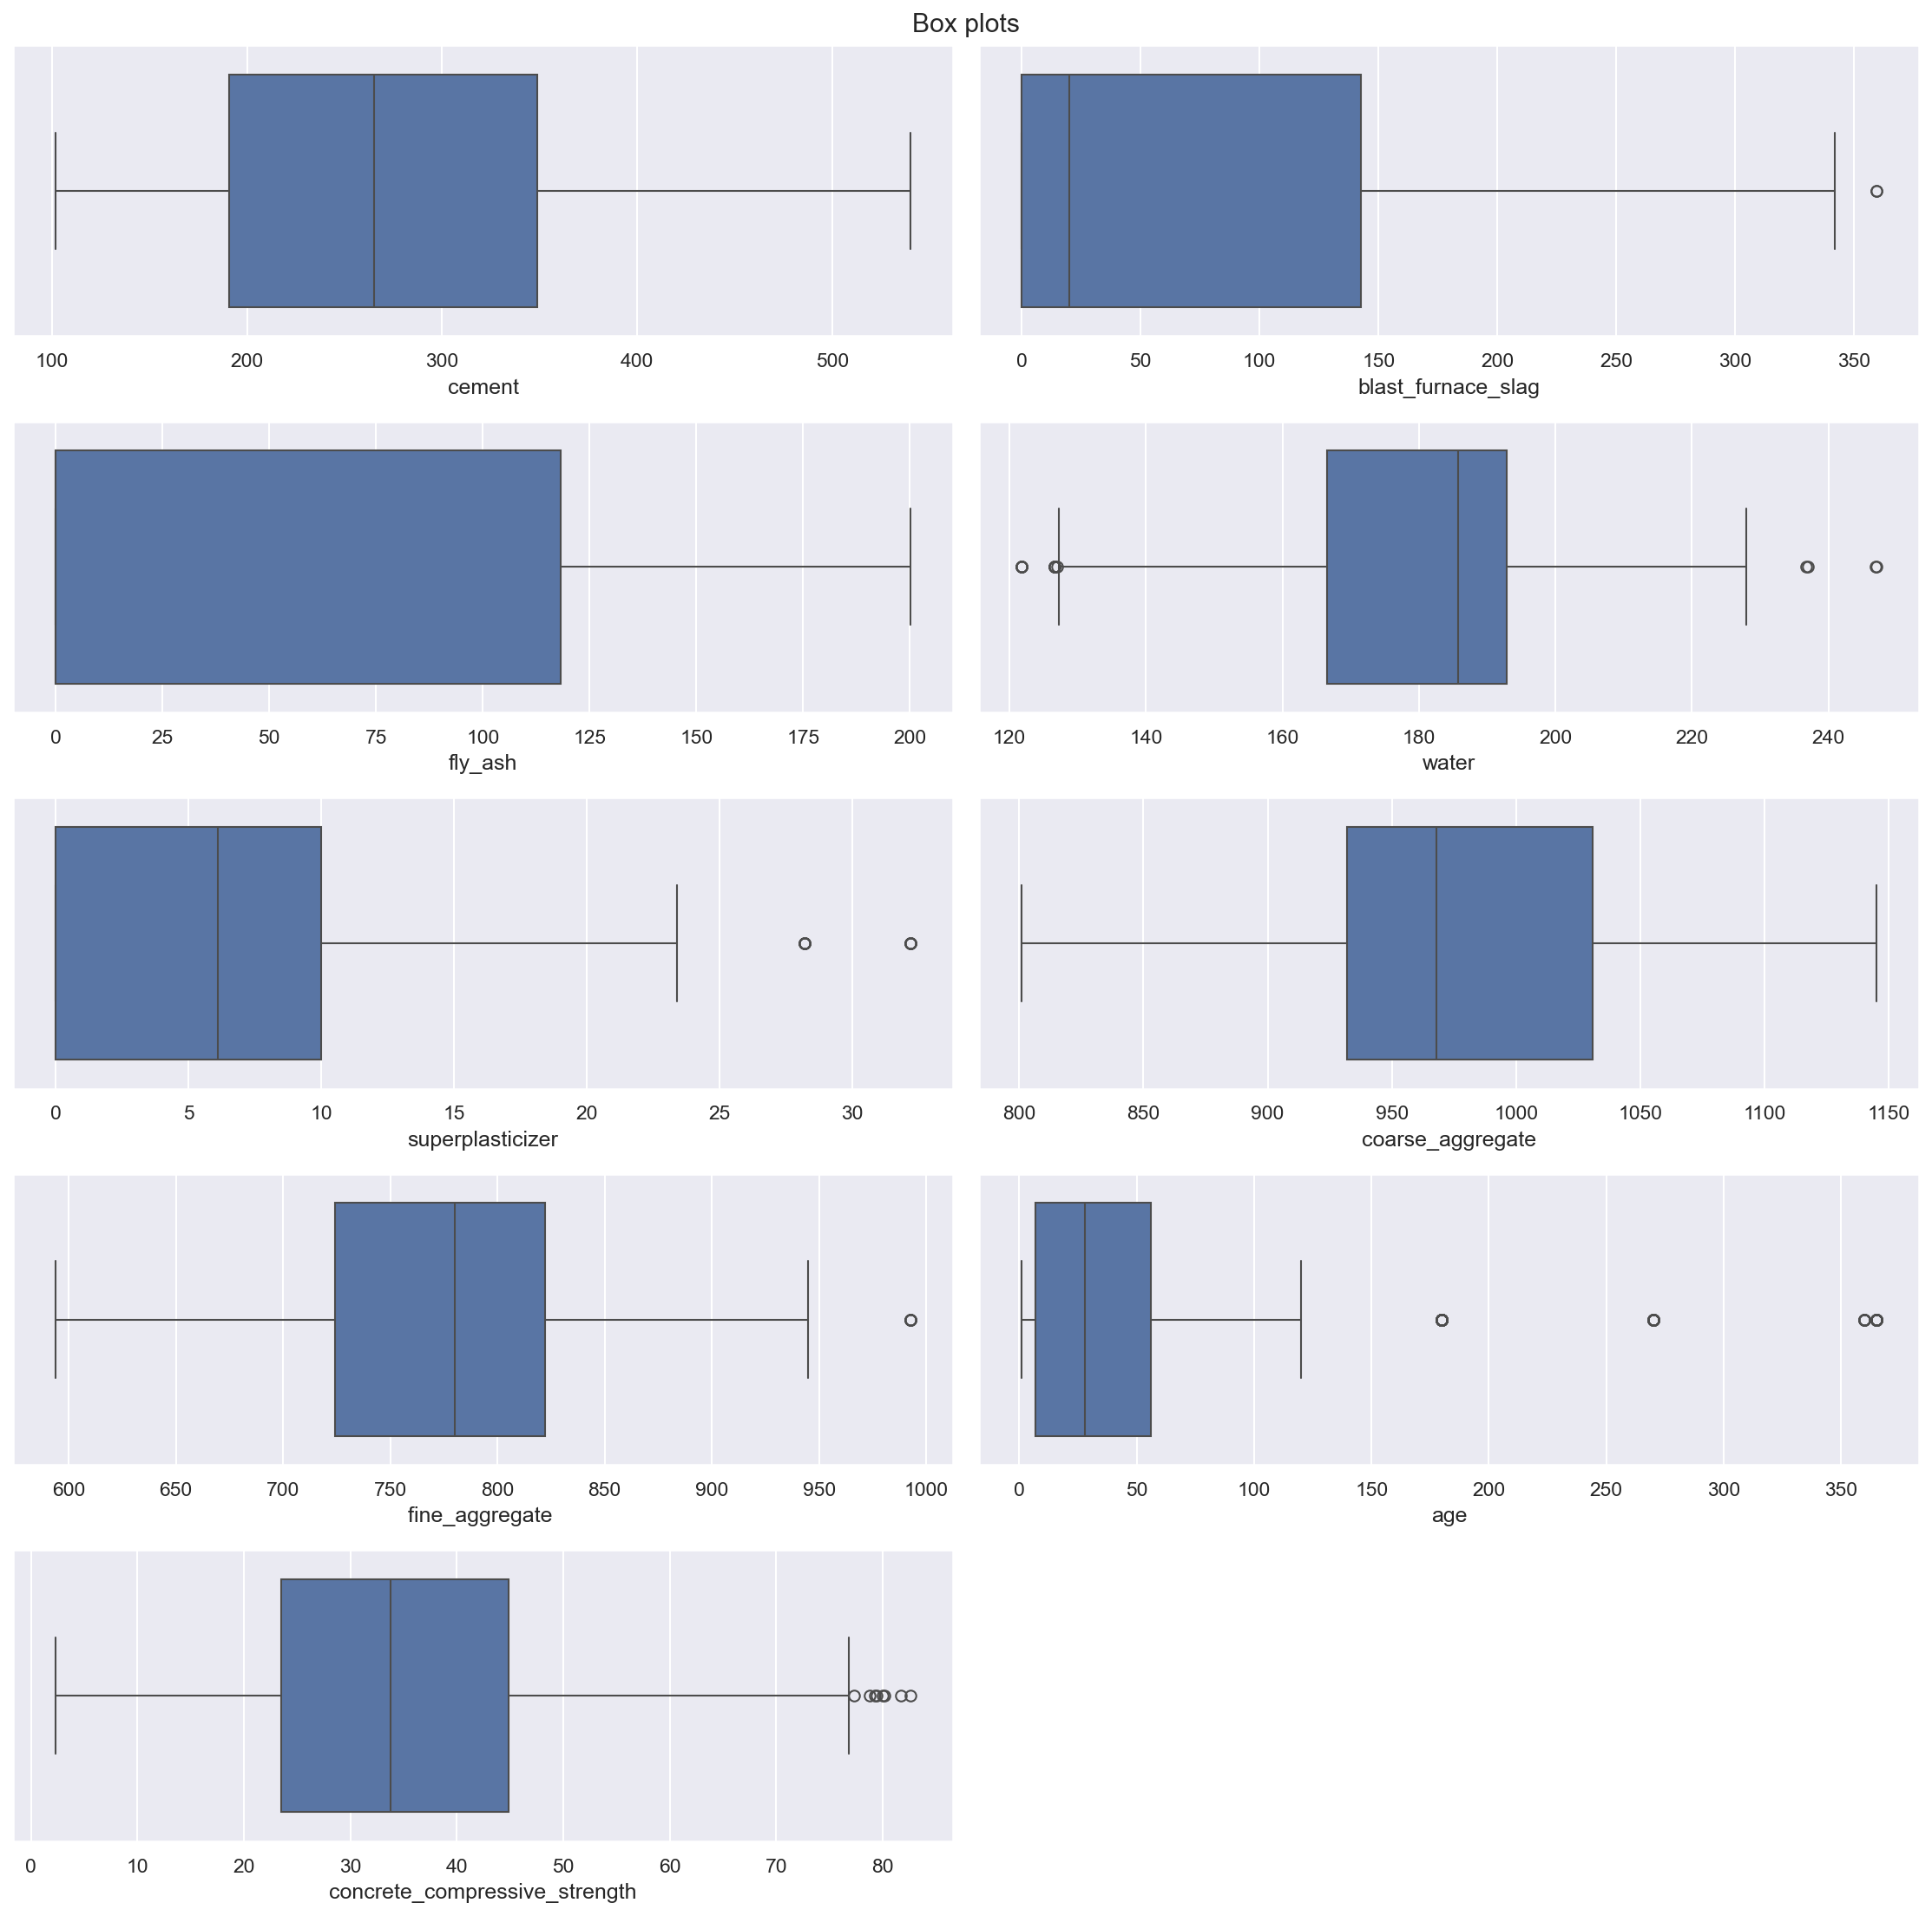

In [20]:
plt.figure(figsize=(15,15),dpi = 150)
for num,col in enumerate(numeric_columns, start = 1):
    plt.subplot(5,2,num)
    sns.boxplot(data = df,x = col)
plt.suptitle('Box plots')
plt.tight_layout()

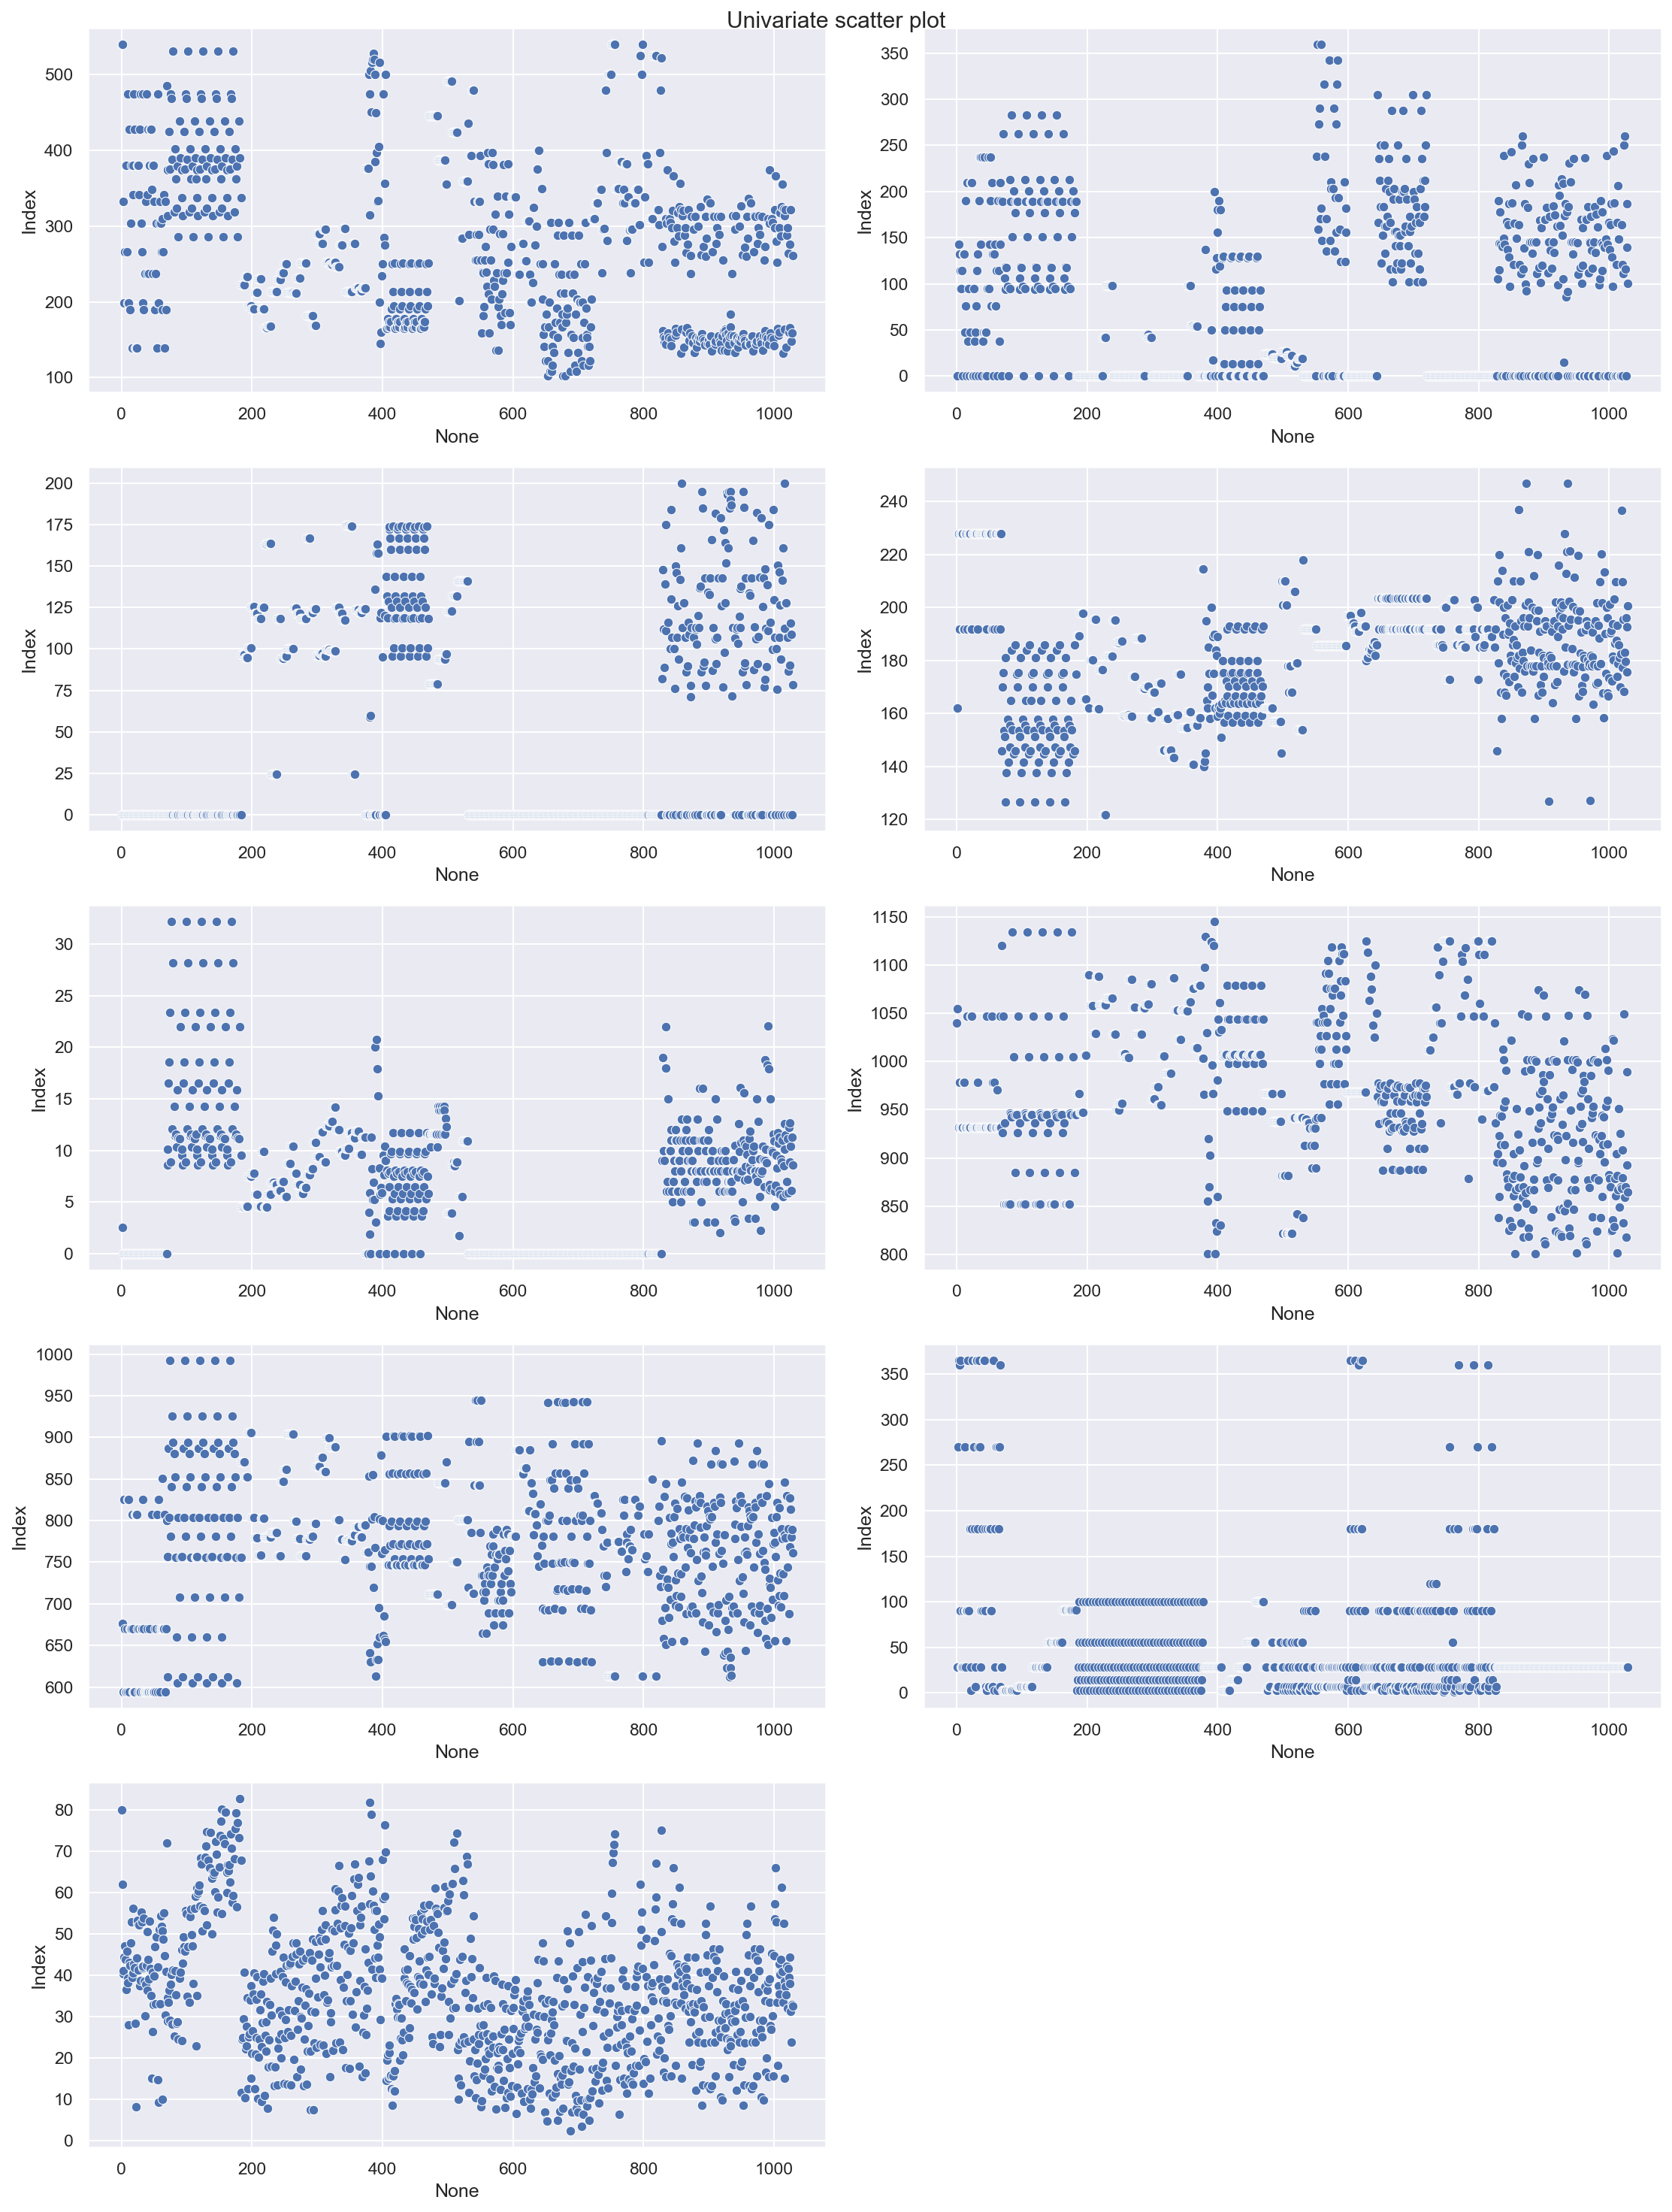

In [21]:
plt.figure(figsize = (15,20), dpi = 150)
for num,col in enumerate(numeric_columns, start = 1):
    plt.subplot(5,2,num)
    sns.scatterplot(x = df.index, y = df[col])
    plt.ylabel('Index')
plt.suptitle('Univariate scatter plot')
plt.tight_layout()

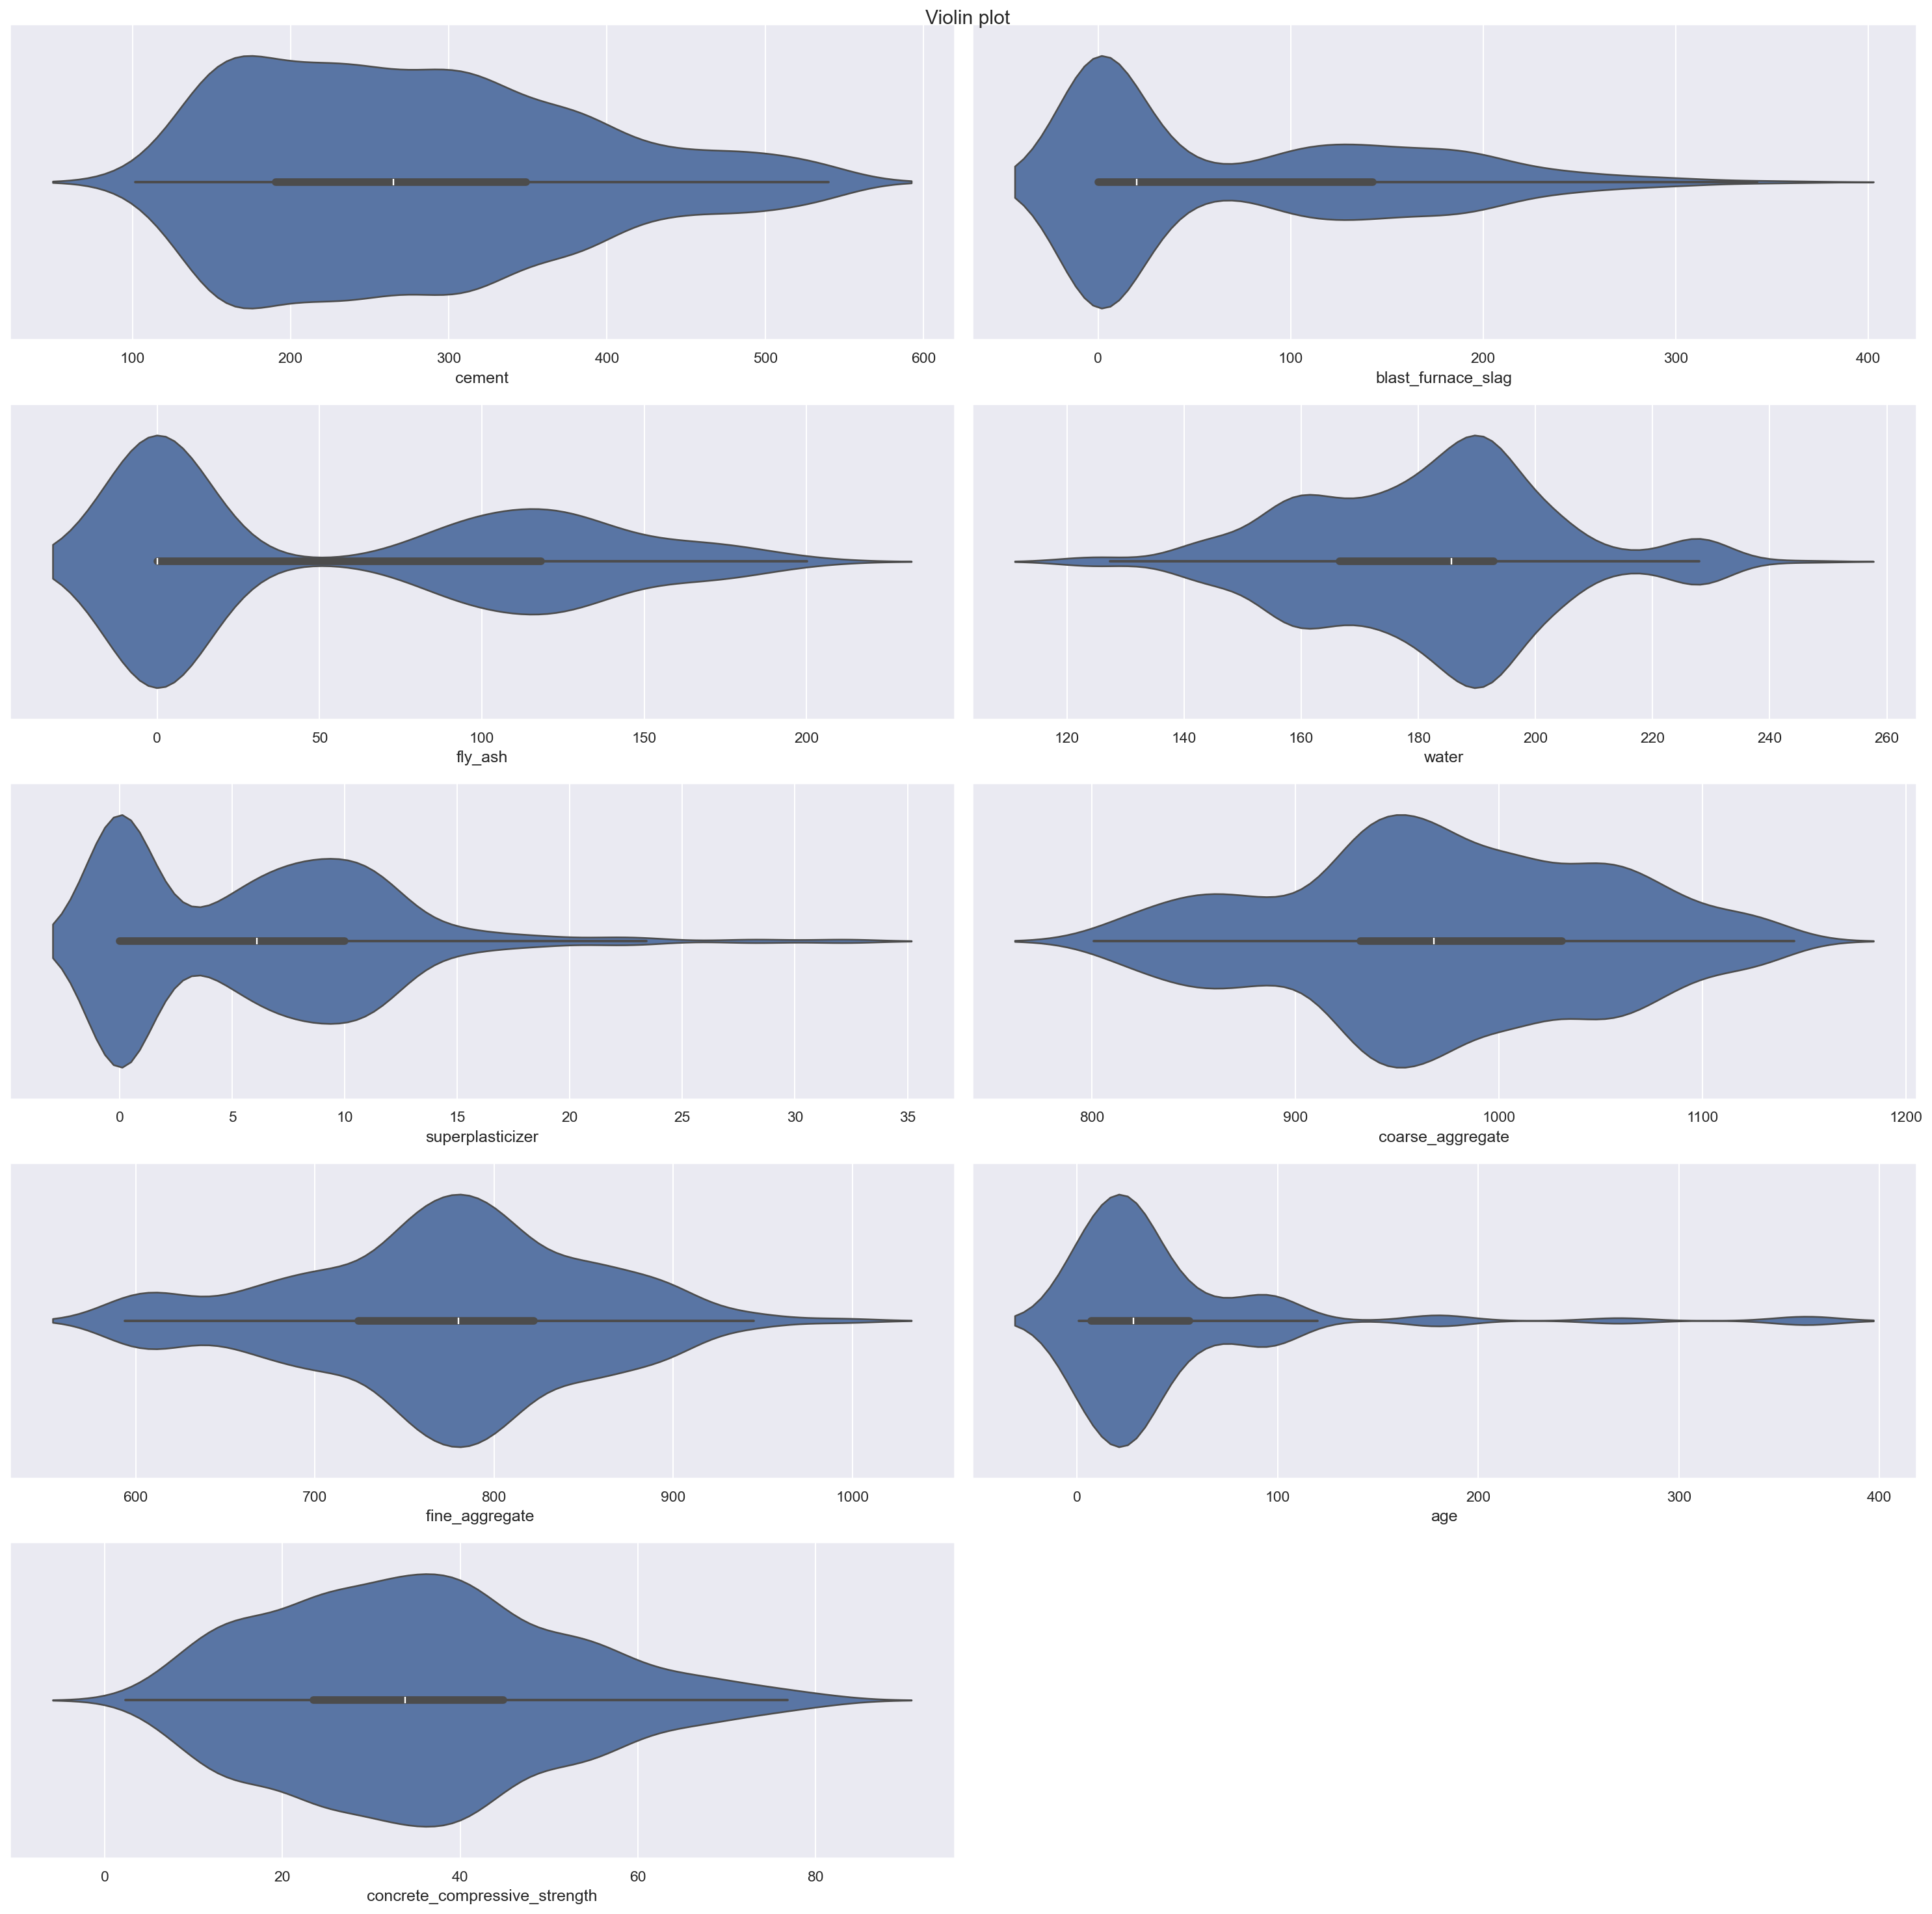

In [22]:
plt.figure(figsize=(20,20),dpi = 150)
for num, col in enumerate(numeric_columns, start = 1):
    plt.subplot(5,2,num)
    sns.violinplot(data = df,x = col)
plt.suptitle('Violin plot')
plt.tight_layout()
plt.show()

### 4) b) Multivariate Analysis

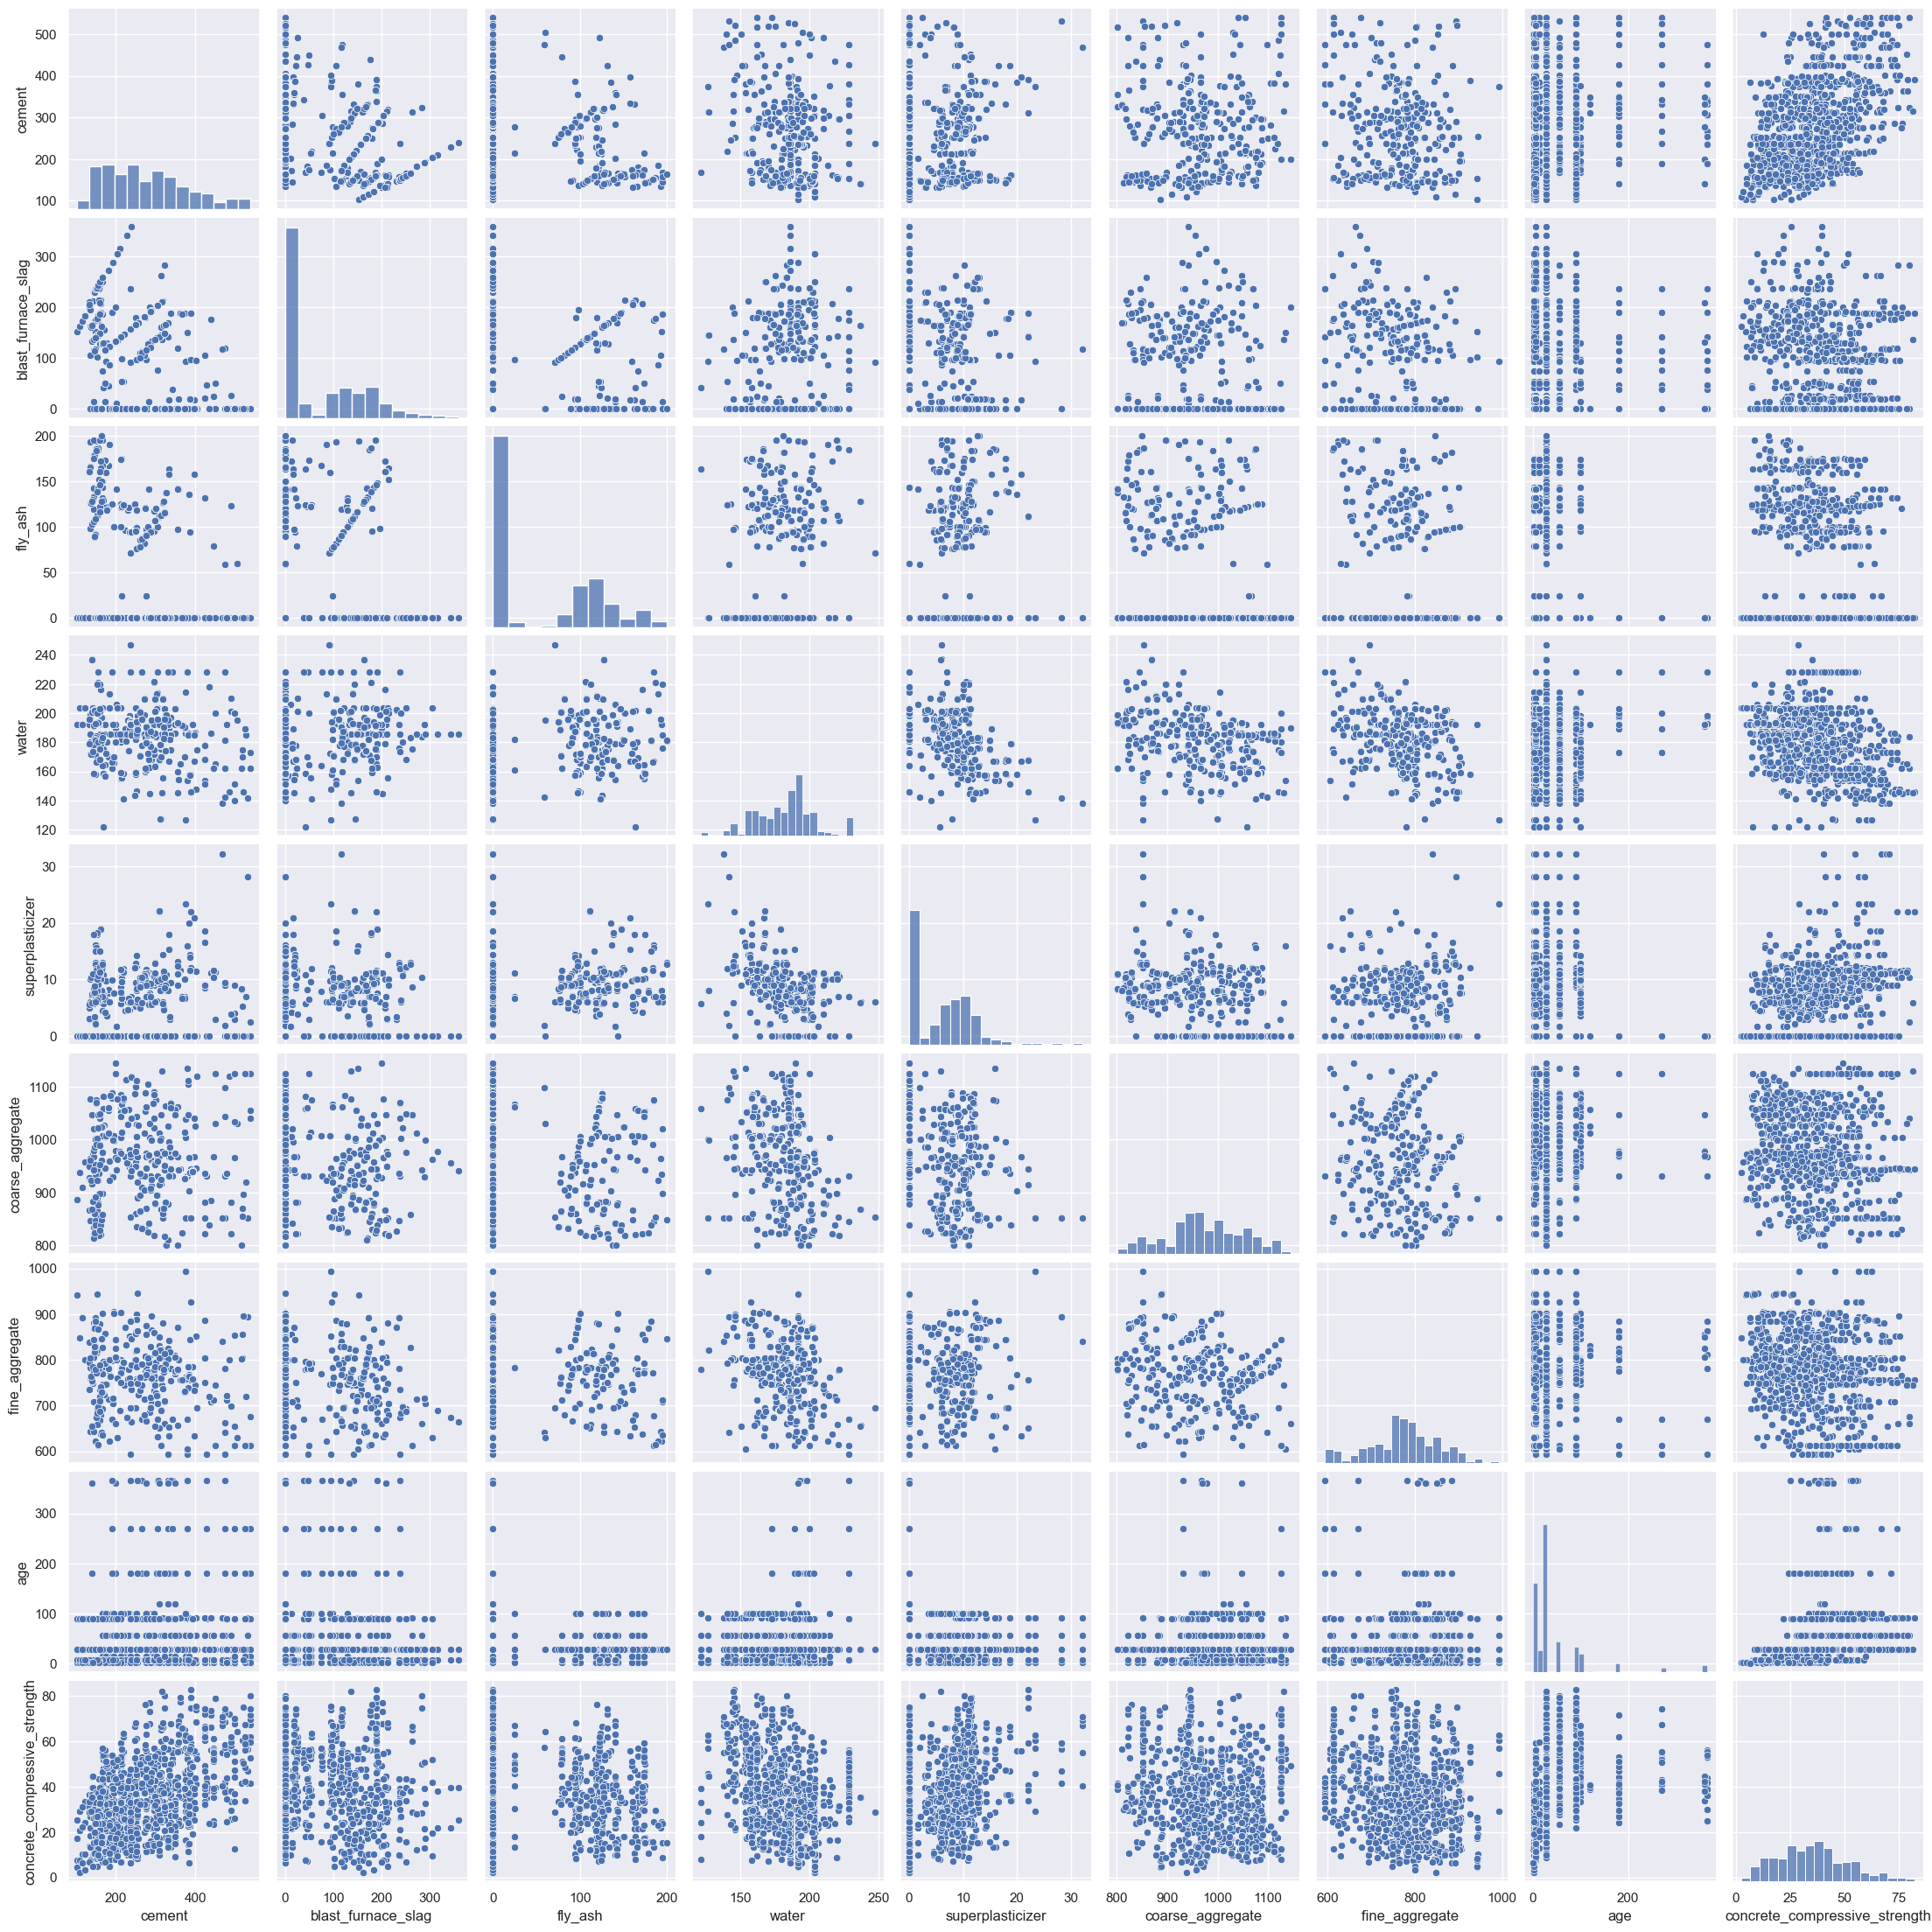

In [23]:
sns.pairplot(data = df)
plt.show()

In [24]:
#Correlation between the columns
corr_df = df.corr()[['concrete_compressive_strength']].sort_values(by = 'concrete_compressive_strength').iloc[:-1]

In [25]:
corr_df

concrete_compressive_strength
water                                   -0.269624
fine_aggregate                          -0.186448
coarse_aggregate                        -0.144717
fly_ash                                 -0.080648
blast_furnace_slag                       0.103374
age                                      0.337367
superplasticizer                         0.344209
cement                                   0.488283

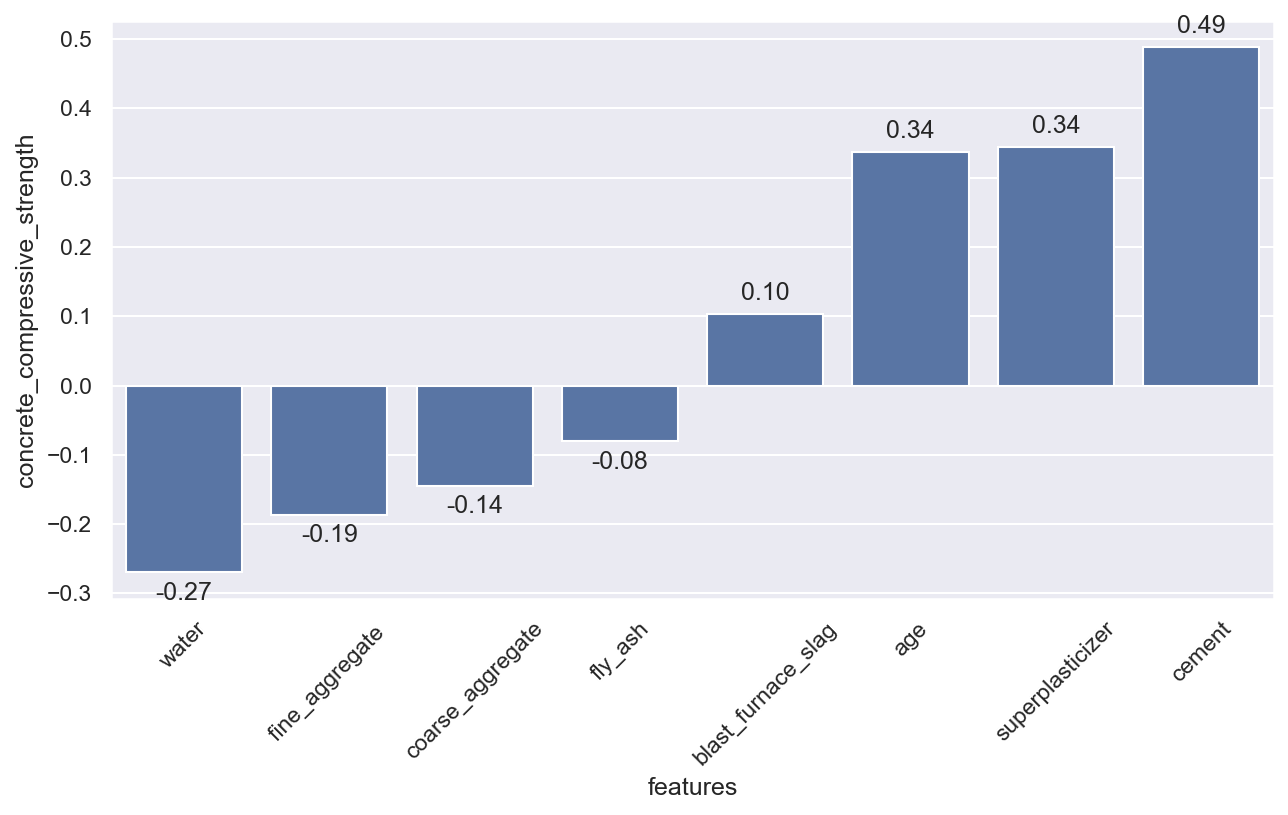

In [26]:
plt.figure(figsize=(10, 5), dpi=150)
ax = sns.barplot(x=corr_df.index, y=corr_df['concrete_compressive_strength'])

for p in ax.patches:
    height = p.get_height()
    if height >= 0:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    else:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, -10), textcoords='offset points')

plt.xlabel('features')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Heatmap')

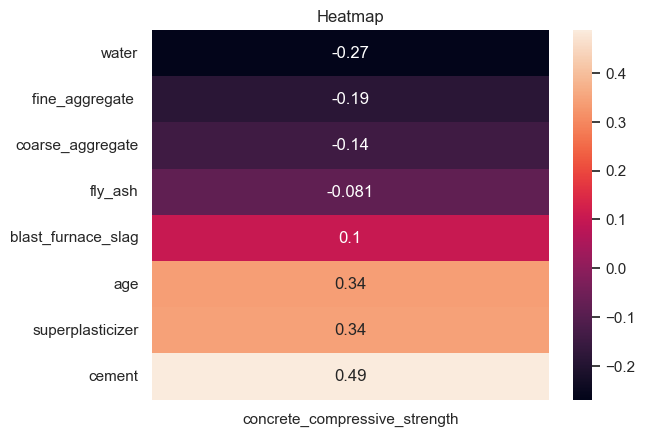

In [27]:
sns.heatmap(data = corr_df,annot=True)
plt.title('Heatmap')

In [28]:
#Skewness in the data
skew_df = pd.DataFrame(df.skew().sort_values(),columns=['skewness'])

In [29]:
skew_df

skewness
fine_aggregate                -0.252353
coarse_aggregate              -0.065256
water                          0.034433
concrete_compressive_strength  0.395696
fly_ash                        0.497231
cement                         0.564959
blast_furnace_slag             0.855225
superplasticizer               0.980604
age                            3.253974

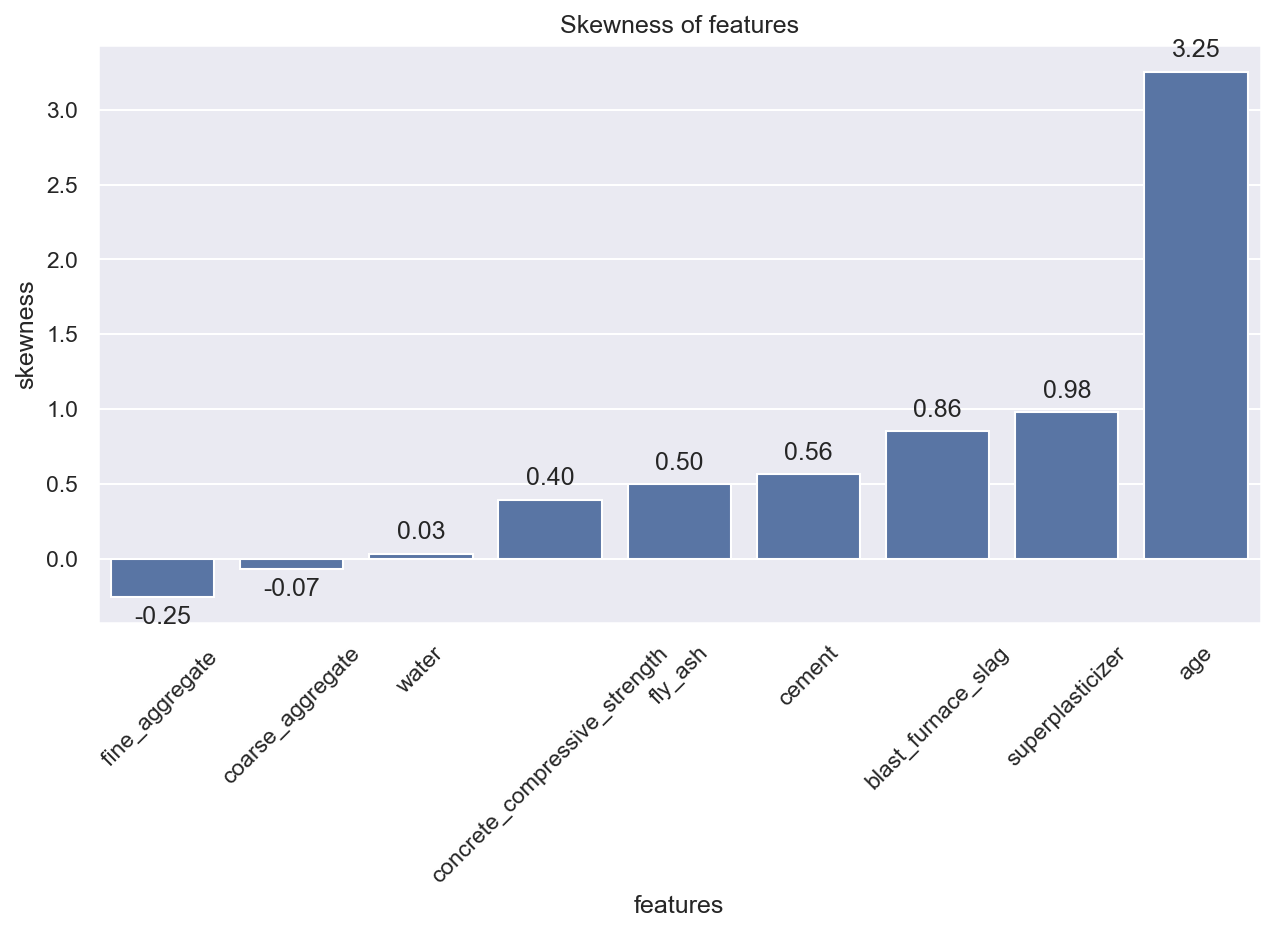

In [30]:
plt.figure(figsize=(10, 5), dpi=150)
ax = sns.barplot(x=skew_df.index, y=skew_df['skewness'])

for p in ax.patches:
    height = p.get_height()
    if height >= 0:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    else:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, -10), textcoords='offset points')

plt.xlabel('features')
plt.xticks(rotation=45)
plt.title('Skewness of features')
plt.show()

Text(0.5, 1.0, 'Heat map for skewness')

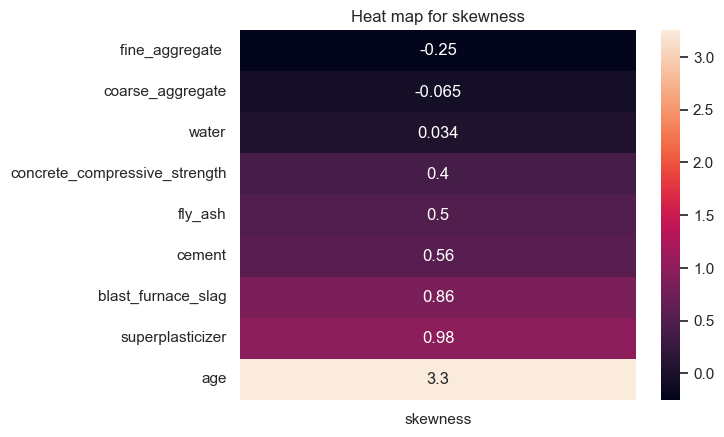

In [31]:
sns.heatmap(data=skew_df,annot=True)
plt.title('Heat map for skewness')